In [1]:
#As seen in the data summary and model selection analysis of the iris dataset, SVM was selected as the most accurate
#This notebook is a standalone svm analysis for the iris dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product
from IPython.display import display
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

In [2]:
iris = datasets.load_iris()
dataset = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset.columns = names
dataset.index = range(1,len(dataset.index.values)+1)
dataset['class'].replace(to_replace = [0.0, 1.0, 2.0], value = ['Setosa', 'Versicolor', 'Virginica'], inplace = True)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


In [3]:
iris_class_dict = {'Setosa':1, 'Virginica':2, 'Versicolor':3}
dataset['class'].replace(['Setosa', 'Virginica', 'Versicolor'], [1,2,3], inplace = True)
print("")
print(iris_class_dict)
dataset.head()


{'Virginica': 2, 'Setosa': 1, 'Versicolor': 3}


,sepal-length,sepal-width,petal-length,petal-width,class
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


In [4]:
#Prepare X and Y data
dataset_split = dataset.values
X = dataset_split[:, 0:4]
Y = dataset_split[:, 4]
#Split 10% of data for testing
seed = 7
val_size = 0.1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = val_size, random_state = seed)

In [5]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
predict_train_svm = clf.predict(X_train)
wrong_train_index = []
for i in range (0,len(Y_train)):
    if predict_train_svm[i] != Y_train[i]:
        wrong_train_index.append(i)
train_accuracy = (len(Y_train) - len(wrong_train_index))/len(Y_train) * 100
print("The accuracy on the training set is {0:.2f}%.".format(train_accuracy))
print("")

predicted_svm = clf.predict(X_test)

svmresults_df = pd.DataFrame(np.column_stack([X_test, predicted_svm, Y_test]), index = range(1,len(predicted_svm)+1)
                            , columns = ['sepal-length','sepal-width', 'petal-length', 'petal-width', 'Wrong Prediction',
                            'Expected Value'])

svmresults_df['Wrong Prediction'] = svmresults_df['Wrong Prediction'].astype(int)
svmresults_df['Expected Value'] = svmresults_df['Expected Value'].astype(int)
svmresults_df['Wrong Prediction'].replace([1,2,3], ['Setosa', 'Virginica', 'Versicolor'], inplace = True)
svmresults_df['Expected Value'].replace([1,2,3], ['Setosa', 'Virginica', 'Versicolor'], inplace = True)

print("Predicted and expected values for test run through SVM algorithm")
display(svmresults_df)

The accuracy on the training set is 98.52%.

Predicted and expected values for test run through SVM algorithm


,sepal-length,sepal-width,petal-length,petal-width,Wrong Prediction,Expected Value
1,5.9,3.0,5.1,1.8,Virginica,Virginica
2,5.4,3.0,4.5,1.5,Versicolor,Versicolor
3,5.0,3.5,1.3,0.3,Setosa,Setosa
4,5.6,3.0,4.5,1.5,Versicolor,Versicolor
5,4.9,2.5,4.5,1.7,Virginica,Virginica
6,4.5,2.3,1.3,0.3,Setosa,Setosa
7,6.9,3.1,4.9,1.5,Versicolor,Versicolor
8,5.6,2.7,4.2,1.3,Versicolor,Versicolor
9,4.8,3.4,1.6,0.2,Setosa,Setosa
10,6.4,3.2,4.5,1.5,Versicolor,Versicolor


In [7]:
wrong_test_predict = []
wrong_test_expect = []
wrong_X_test_data = []
for i in range (0, len(predicted_svm)):
    if predicted_svm[i] != Y_test[i]:
        wrong_X_test_data.append(X_test[i])
        wrong_test_predict.append(predicted_svm[i])
        wrong_test_expect.append(Y_test[i])
        
wrong_test_predictions = pd.DataFrame(np.column_stack([wrong_X_test_data, wrong_test_predict, wrong_test_expect]),
                                      index = range(1,len(wrong_test_predict)+1), columns = ['sepal-length',
                                      'sepal-width', 'petal-length', 'petal-width','Wrong Prediction',
                                      'Expected Value'])

wrong_test_predictions['Wrong Prediction'] = wrong_test_predictions['Wrong Prediction'].astype(int)
wrong_test_predictions['Expected Value'] = wrong_test_predictions['Expected Value'].astype(int)
wrong_test_predictions['Wrong Prediction'].replace([1,2,3], ['Setosa', 'Virginica', 'Versicolor'], inplace = True)
wrong_test_predictions['Expected Value'].replace([1,2,3], ['Setosa', 'Virginica', 'Versicolor'], inplace = True)

test_accuracy = (len(Y_test) - len(wrong_test_predict))/len(Y_test) * 100
print("The accuracy for SVM on the test set is {0:.2f}%.".format(test_accuracy))
print("")
print("Displaying the wrong predictions compared to expected values")
display(wrong_test_predictions)

The accuracy for SVM on the test set is 93.33%.

Displaying the wrong predictions compared to expected values


,sepal-length,sepal-width,petal-length,petal-width,Wrong Prediction,Expected Value
1,6.7,3.0,5.0,1.7,Virginica,Versicolor


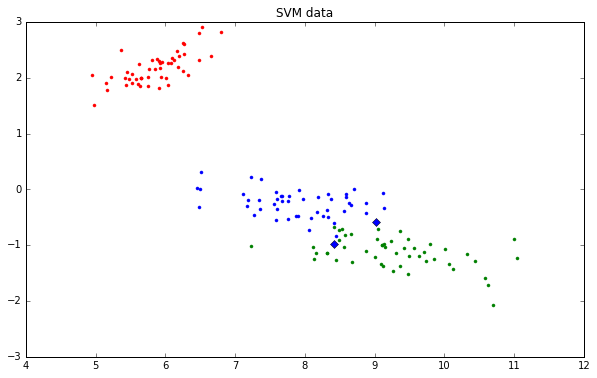

In [8]:
#To visualize the iris dataset SVM, the X data needs to be decomposed to 2 dimensions
#After performing svd on the data, 
svm_all_fit = clf.fit(X, Y.astype(int))
svm_all_pred = svm_all_fit.predict(X)
svd=TruncatedSVD().fit_transform(X)

plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
plt.title("SVM data")
colors = ['r','g','b']

#The data is plotted as points
for t in [0,1,2]:
    plt.plot(svd[Y==t+1][:,0], svd[Y==t+1][:,1], colors[t]+'.')
    
#Using the wrong predictions, the errors can be highlighted on the graph as diamonds
#The coordinates are determined by finding the svd values where the predict is not the expected
error_X,error_Y = svd[svm_all_pred!=Y],Y[svm_all_pred!=Y]
for t in [0,1,2]:
    plt.plot(error_X[error_Y==t+1][:,0],error_X[error_Y==t+1][:,1],colors[t]+'D')
plt.show()

#As seen in the plot, two wrongly predicted Virginica can be observed as large stars